# Spectral Plasmonics technical interview answer

## Assignment description

### 1) Available data:
The raw data consists of 4 different types of spectra labelled A, B, C and D stored in .csv files. Their X-column indicates the wavenumber (spatial frequency), while the Y-coloumn is the measured spectral intensity. Each datafile is also labelled with the concentration of the corresponding compound. For example "C25-Sample_13.csv" indicates that the spectrum is for a 25% concentration of compound C and that this particular file is the 13th one. 

### 2) Task:

a) Create a machine learning model that is able to determine the compound type based on the provided spectrum.

b) Evaluate its performance (accuracy, recall, precision) and save it properly.

c) Provide informative descriptions of the code and instructions for running the model.

### 3) Misc.

Should take 3-4 hours to complete the main task. May take additional time to polish etc.



# Exploratory analysis

First, we load and plot some sample data to gain intuition about its properties

In [1]:
#Import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
#Import individual datafiles for 100% concentration
basepath = os.getcwd()+"\\HW_Data\\"
path_A=basepath+"A\\"
path_B=basepath+"B\\"
path_C=basepath+"C\\"
path_D=basepath+"D\\"

df_A = pd.read_csv(path_A+"A100-Sample_10.csv")
df_B = pd.read_csv(path_B+"B100-Sample_10.csv")
df_C = pd.read_csv(path_C+"C100-Sample_10.csv")
df_D = pd.read_csv(path_D+"D100-Sample_10.csv")
df_A.head()

,x,y
0,400.0,706.310975
1,401.0,637.765925
2,402.0,576.315405
3,403.0,521.366846
4,404.0,472.327677


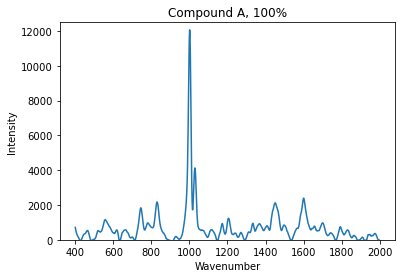

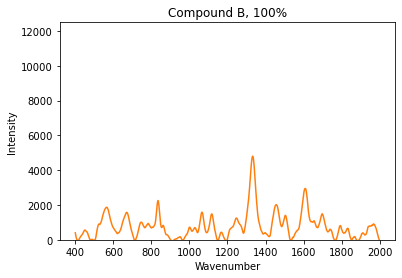

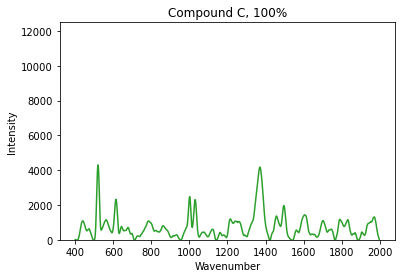

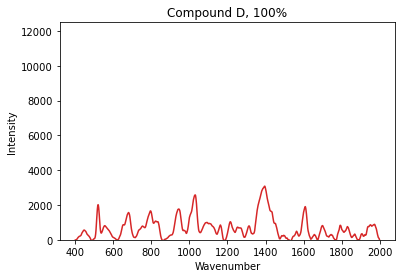

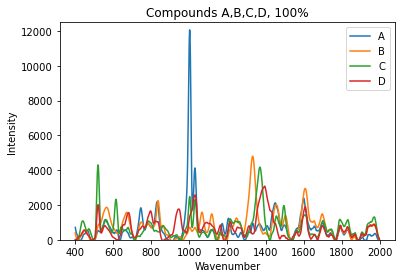

In [3]:
#Plot spectra
wavenumber = df_A['x']
Intensity_A = df_A['y']
Intensity_B = df_B['y']
Intensity_C = df_C['y']
Intensity_D = df_D['y']

n_spectrum_points = len(wavenumber)

fig, ax = plt.subplots()
ax.set_title('Compound A, 100%')
ax.plot(wavenumber,Intensity_A, color = 'C0')
ax.set_ylim(-5,12500)
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Intensity')
plt.show()

fig, ax = plt.subplots()
ax.set_title('Compound B, 100%')
ax.plot(wavenumber,Intensity_B, color = 'C1')
ax.set_ylim(-5,12500)
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Intensity')
plt.show()

fig, ax = plt.subplots()
ax.set_title('Compound C, 100%')
ax.plot(wavenumber,Intensity_C, color = 'C2')
ax.set_ylim(-5,12500)
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Intensity')
plt.show()

fig, ax = plt.subplots()
ax.set_title('Compound D, 100%')
ax.plot(wavenumber,Intensity_D, color = 'C3')
ax.set_ylim(-5,12500)
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Intensity')
plt.show()




fig, ax = plt.subplots()
ax.set_title('Compounds A,B,C,D, 100%')
ax.plot(wavenumber,Intensity_A, color = 'C0', label = 'A')
ax.plot(wavenumber,Intensity_B, color = 'C1', label = 'B')
ax.plot(wavenumber,Intensity_C, color = 'C2', label = 'C')
ax.plot(wavenumber,Intensity_D, color = 'C3', label = 'D')
ax.legend()
ax.set_ylim(-5,12500)
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Intensity')
plt.show()



# Initial observations

* Compound A has a strong peak near 1000 but no strong peak near 1350.
* Compound B is the only one to peak near 600
* Compound C peaks slightly above 1300
* Compound D peaks near 925 and near 1400

# Importing all the data

In [10]:
import glob

folderNames = ["A","B","C","D"]
fileNameList = []

#Empty array for holding .csv filenames


nFiles = np.array([0,0,0,0]) #Empty array for storing number of files for each compound

#Loop to get all file names
for i, name in enumerate(folderNames):
    currentPath = basepath+name+'\\'
    filesInFolder = glob.glob(currentPath+'*.csv')
    
    nFiles[i]=len(filesInFolder)
    
    fileNameList=fileNameList+filesInFolder

nFilesTotal=np.sum(nFiles)
nA=nFiles[0]
nB=nFiles[1]
nC=nFiles[2]
nD=nFiles[3]

#Create array of Y-values with "A"=0, "B"=1, "C"=2, "D"=3 
Y = np.zeros( nFilesTotal )
Y[0:nA]=0
Y[nA:nA+nB]=1
Y[nA+nB:nA+nB+nC]=2
Y[nA+nB+nC:nA+nB+nC+nD]=3
print(Y)
print(f"Total number of .csv files = {nFilesTotal}. [nA,nB,nC,nD]=[{nA},{nB},{nC},{nD}]")



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3.]
Total number of .csv files = 73. [nA,nB,nC,nD]=[15,15,25,18]


Shape of X = (73, 1601)
Shape of Y = (73,)


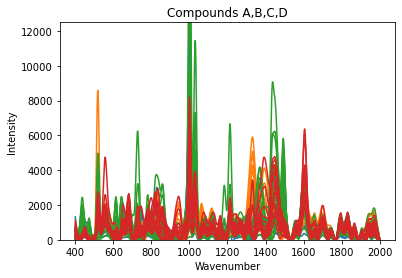

In [11]:

#Empty array for spectra
X = np.zeros( (nFilesTotal,n_spectrum_points) )*1.0
print(f"Shape of X = {np.shape(X)}")
print(f"Shape of Y = {np.shape(Y)}")

#Fill out array of spectra
for i, filename in enumerate(fileNameList):
    df_current = pd.read_csv(filename)
    X[i,:]= df_current["y"]

    
#Make plot to verify that everything is loaded and stored as expected
fig, ax = plt.subplots()
ax.set_title('Compounds A,B,C,D')
for i in range(nFilesTotal):
    ax.plot(wavenumber,X[i,:], color = f'C{int(Y[i])}')

ax.set_ylim(-5,12500)
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Intensity')
plt.show()


# Create train and test datasets

In [12]:
from sklearn.model_selection import train_test_split
# Use 75% of data for training and 25% for testing
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=123)
print(np.shape(X_train),np.shape(Y_train))
print(np.shape(X_test),np.shape(Y_test))


(54, 1601) (54,)
(19, 1601) (19,)


# Initiate SVC model
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) #Note: Uses exp(  - gamma || x-x' ||^2 ) kernel
clf.fit(X_train, Y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [20]:
number_of_correct_guesses = 0
for i in range(len(Y_test)):
    predicted_compound = int(clf.predict(X_test[i,:].reshape(-1,1).T ))
    actual_compound = Y_test[i]
    
    pass_fail_str = "Fail :-/"
    if predicted_compound == actual_compound:
        number_of_correct_guesses+=1
        pass_fail_str= "Pass!!!"
    print(predicted_compound,actual_compound,pass_fail_str)

print(f"Number of correct guesses = {number_of_correct_guesses} out of {len(Y_test)}")


2 3.0 Fail :-/
2 2.0 Pass!!!
3 3.0 Pass!!!
2 2.0 Pass!!!
2 2.0 Pass!!!
3 3.0 Pass!!!
3 3.0 Pass!!!
1 1.0 Pass!!!
0 0.0 Pass!!!
0 0.0 Pass!!!
3 3.0 Pass!!!
0 0.0 Pass!!!
1 3.0 Fail :-/
2 2.0 Pass!!!
3 3.0 Pass!!!
2 2.0 Pass!!!
0 0.0 Pass!!!
1 1.0 Pass!!!
2 2.0 Pass!!!
Number of correct guesses = 17 out of 19


# Save model 
https://scikit-learn.org/stable/model_persistence.html

In [23]:
from joblib import dump, load

dump(clf, 'oles_model_V1.joblib')    

clf2 = load('oles_model_V1.joblib') 

number_of_correct_guesses = 0
for i in range(len(Y_test)):
    predicted_compound = int(clf2.predict(X_test[i,:].reshape(-1,1).T ))
    actual_compound = Y_test[i]
    
    pass_fail_str = "Fail :-/"
    if predicted_compound == actual_compound:
        number_of_correct_guesses+=1
        pass_fail_str= "Pass!!!"
    print(predicted_compound,actual_compound,pass_fail_str)

print(f"Number of correct guesses = {number_of_correct_guesses} out of {len(Y_test)}")

2 3.0 Fail :-/
2 2.0 Pass!!!
3 3.0 Pass!!!
2 2.0 Pass!!!
2 2.0 Pass!!!
3 3.0 Pass!!!
3 3.0 Pass!!!
1 1.0 Pass!!!
0 0.0 Pass!!!
0 0.0 Pass!!!
3 3.0 Pass!!!
0 0.0 Pass!!!
1 3.0 Fail :-/
2 2.0 Pass!!!
3 3.0 Pass!!!
2 2.0 Pass!!!
0 0.0 Pass!!!
1 1.0 Pass!!!
2 2.0 Pass!!!
Number of correct guesses = 17 out of 19


# Potential improvements
* Probabilistic confidence that spectrum is A, B, C, D.
* Augment 100% concentration data files and add them together (or gather more data) to analyze mixed samples. 
* Analysis of failure cases. Is compound D easily mistaken for C or B and why?
* Find way to identify compound (categorical) AND concentration (continuous).
* Systematically modify model parameters to enhance performance.